Since time immemorial, our parents and grandparents have extolled the virtue of discipline and saving. As we start to get older and our monthly saving start to become substantial, and if we leave in lying around in cash, inflation reduces the purchasing power by a whopping 3% per year. In light of this, the best course would be to invest the money and allow our nest eggs to grow from a young age. 

## Overarching question
Having decided that it is essential to invest, the next question then is: `What company should I invest in and what model should I use?` This notebook tries to answer this. We take initial capital to be $10,000.


## Profile of investor 👨
We assume that our fictitious investor is a 28 year old graduate working in the Tech sector, since we will be in that position in the not so distant future. 

Objectives of our investor: 
Since he is young and no other financial commitments, our investor is looking to invest in `high growth` stocks. Correspondingly, he also has a large appetite for risk since he believes that he can recuperate any losses he makes at this age. The investment horizon is between `1-2 years`

## 1. Deciding which sector to invest in 
We start off by analysing and selecting the sector to invest in using the AlphaVantage API. The key metric we will be looking out for is `good mid-term performance (in the past 5 years)`

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas_datareader.data as web 
from pandas import Series, DataFrame
from alpha_vantage.sectorperformance import SectorPerformances 
from alpha_vantage.timeseries import TimeSeries

key = '<AlphaVantage_API_Key>'

sp = SectorPerformances(key, output_format = 'pandas')

#Get proper column names
spColumns = [x for x in SectorPerformances(key).get_sector()[0].keys()]
spData, meta_data = sp.get_sector()
count = 0
spColumnsDict = {}

for col in spData.columns:
    spColumnsDict[col] = spColumns[count]
    count += 1
spData.rename(columns = spColumnsDict)

,Rank A: Real-Time Performance,Rank B: 1 Day Performance,Rank C: 5 Day Performance,Rank D: 1 Month Performance,Rank E: 3 Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: 1 Year Performance,Rank H: 3 Year Performance,Rank I: 5 Year Performance,Rank J: 10 Year Performance
Information Technology,0.0142,0.0142,0.0581,0.0903,0.0799,0.0765,0.6907,1.2113,2.3839,4.9000
Consumer Discretionary,0.0048,0.0048,0.0405,0.1092,0.0501,0.0712,0.6988,0.7406,1.2521,3.4930
Industrials,0.0021,0.0021,0.0116,0.0679,0.1082,0.1229,0.6563,0.3748,0.7736,1.5758
Materials,0.0016,0.0016,0.0077,0.0567,0.0299,0.0939,0.6887,0.4090,0.7939,0.9763
Health Care,0.0011,0.0011,-0.0005,0.0339,-0.0017,0.0270,0.2882,0.4700,0.6905,2.5253
Consumer Staples,0.0007,0.0007,0.0126,0.0708,0.0323,0.0171,0.2122,0.3110,0.3001,1.2616
Financials,-0.0001,-0.0001,0.0233,0.0363,0.1258,0.1804,0.6374,0.2839,0.9552,1.5886
Communication Services,-0.0008,-0.0008,0.0512,0.0580,0.1393,0.1334,0.6279,0.6616,0.4961,0.9075
Utilities,-0.0011,-0.0011,0.0137,0.0933,0.0492,0.0334,0.1769,0.2889,0.3361,1.0247
Real Estate,-0.0056,-0.0056,0.0195,0.0991,0.1462,0.1049,0.2897,0.3196,NaN,NaN


A dataframe is not all that informative, we extract the `5 Year Performance` column and visualise it to get a better idea of it.

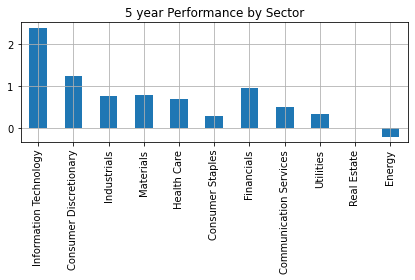

In [6]:
spData['Rank I: Year Performance'].plot(kind='bar')
plt.title('5 year Performance by Sector')
plt.tight_layout()
plt.grid(True)

As we can see in the visualisation above, the IT sector is far and away the best performing sector. 

 # Proxy companies

We delve further into our sector analysis by analysing the largest public company from each sector, determined by their market capitalisation. These companies represents a significant portion of the industry, as such their performance would give a fair representation of their industry's performance.

In [10]:
biggestCompanies_df = pd.read_csv('biggest_comp.csv', index_col=0)
biggestCompanies_df

,Companies,Ticker,Market Capitalisation (Trillion)
Sector,,,
Financials,Visa,V,0.4860
Industrials,3M,MMM,0.1110
Health Care,United Health,UHN,0.3500
Utilities,NextEra Energy,NEE,0.1430
Consumer Staples,Walmart,WMT,0.3777
Materials,DowDuPont,DD,0.0410
Real Estate,American Tower,AMT,0.1000
Communication Services,AT&T,T,0.2140
Consumer Discretion,Booking Holdings,BKNG,0.0850


In [7]:
# Import and view competitors' stock prices 
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2021,3,26)
sectorcomp = web.DataReader(['V','MMM','UHN','NEE','WMT','DD','AMT','T','BKNG','AAPL','XOM'],'yahoo', start = start, end=end)['Adj Close']
sectorcomp

Symbols,V,MMM,UHN,NEE,WMT,DD,AMT,T,BKNG,AAPL,XOM
Date,,,,,,,,,,,
2014-12-31,62.831757,137.289230,21.580000,22.561508,74.228455,54.952423,87.875038,23.519888,1140.209961,25.100164,69.394279
2015-01-02,63.507534,137.071991,21.230000,22.646406,74.245743,54.928326,88.603989,23.715950,1142.060059,24.861401,69.679512
2015-01-05,62.105679,133.980652,20.540001,22.406557,74.029671,53.229511,87.323853,23.491886,1097.579956,24.161013,67.772957
2015-01-06,61.705475,132.551971,20.090000,22.493582,74.600113,52.374077,87.092728,23.526897,1079.959961,24.163294,67.412659
2015-01-07,62.532223,133.512802,19.830000,22.699474,76.579414,52.289738,88.008392,23.555304,1069.569946,24.502111,68.095718
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,208.000000,189.470001,NaN,71.690002,132.369995,77.559998,225.830002,29.990000,2231.889893,123.389999,55.910000
2021-03-23,208.149994,188.330002,NaN,74.019997,133.940002,75.320000,229.850006,30.000000,2215.000000,122.540001,55.220001
2021-03-24,208.070007,190.690002,NaN,72.830002,133.110001,76.680000,227.000000,29.990000,2202.729980,120.089996,56.340000


In [8]:
# Finding out if there is a correlation between prices of different stocks 
retsectorcomp = sectorcomp.pct_change()
sectorcorr = sectorcomp.corr()

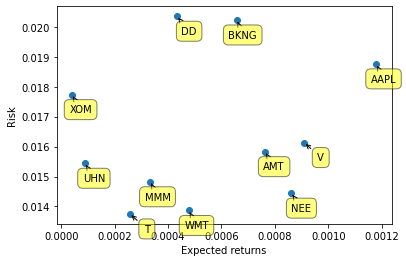

In [9]:
plt.scatter(retsectorcomp.mean(), retsectorcomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retsectorcomp.columns, retsectorcomp.mean(), retsectorcomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

As can be seen from the visualisation above, Apple (Ticker: AAPL) from the Information Technology sector has the highest expected returns as well as a good risk-reward ratio as it falls below the diagonal straight line that cuts through the graph. This suggest that the Information Technology sector is a promising sector to look into for high growth stocks.

In [10]:
# Run kernel density estimation 
from pandas.plotting import scatter_matrix

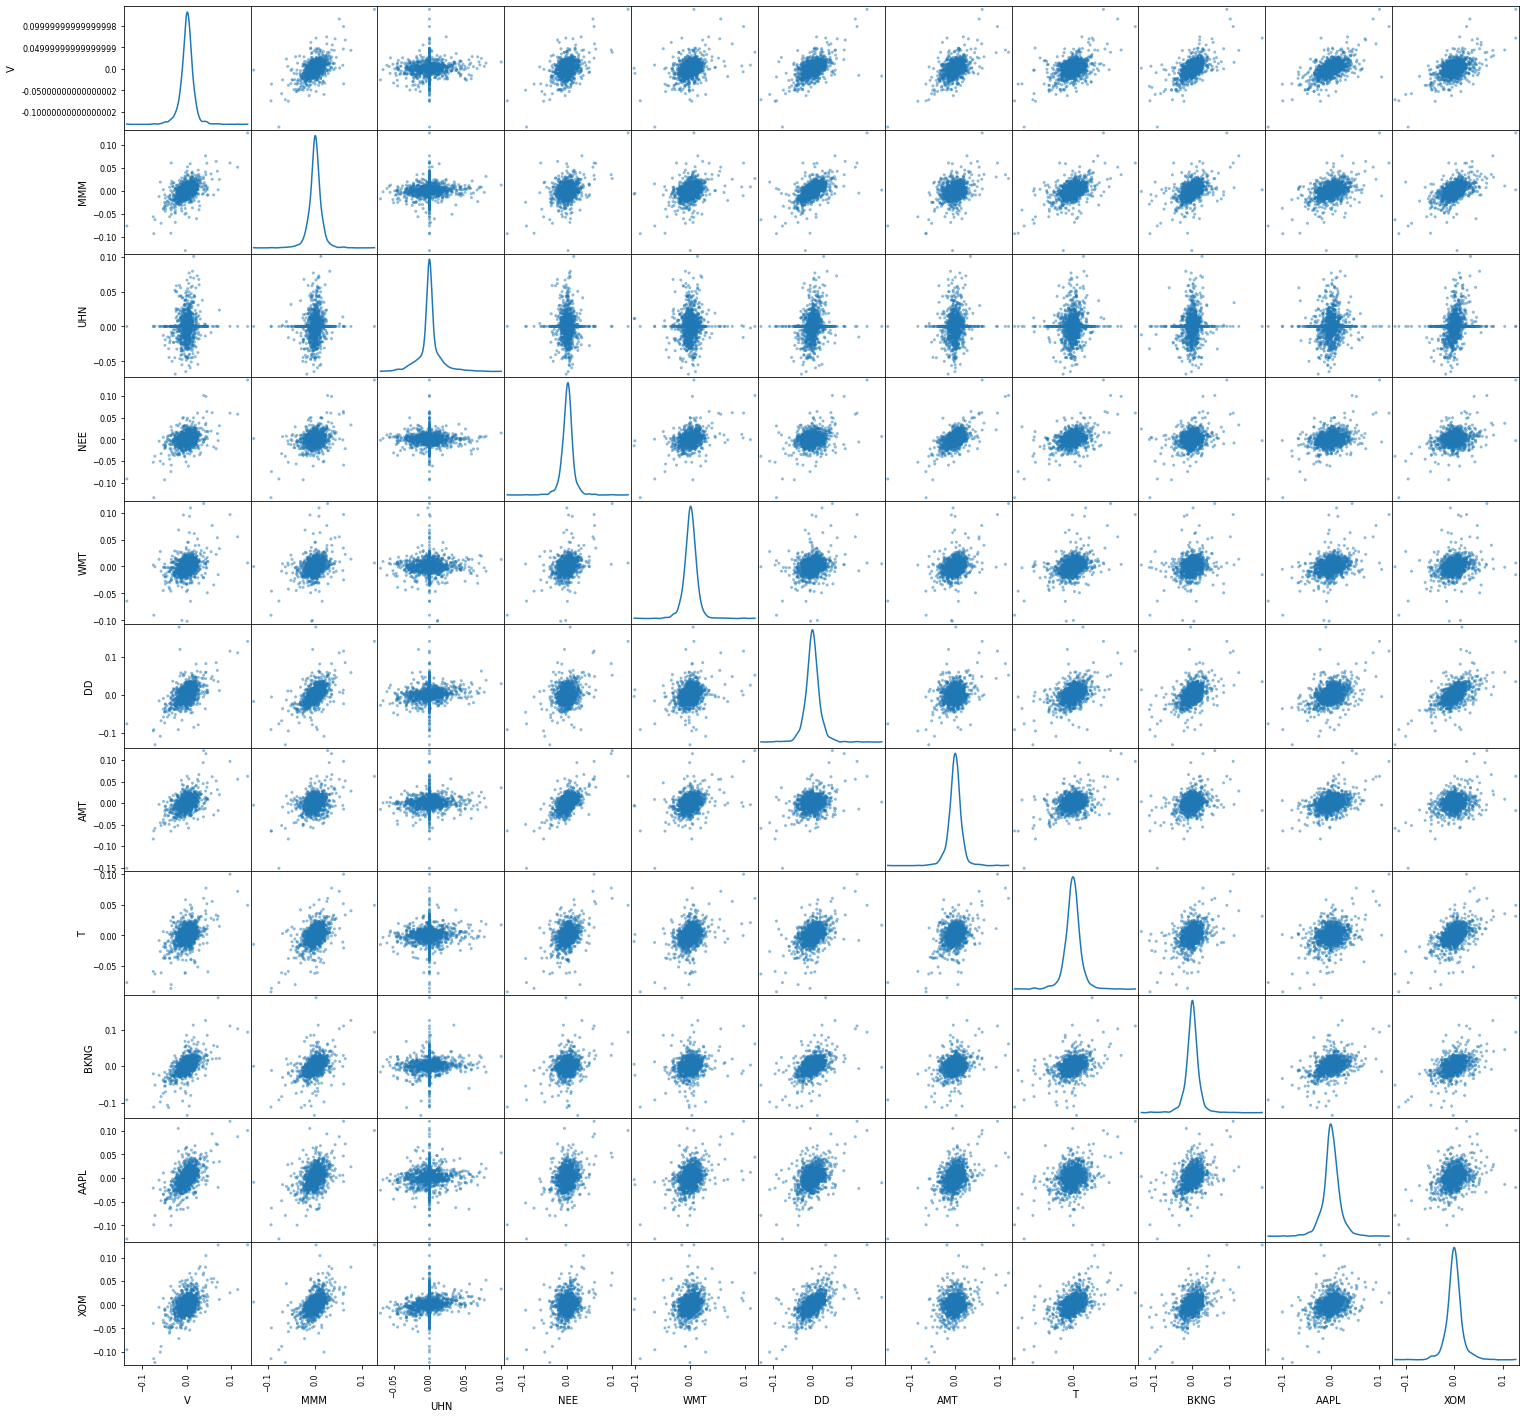

In [11]:
import warnings
warnings.filterwarnings('ignore')
pd.plotting.scatter_matrix(retsectorcomp, diagonal='kde', figsize=(25,25));

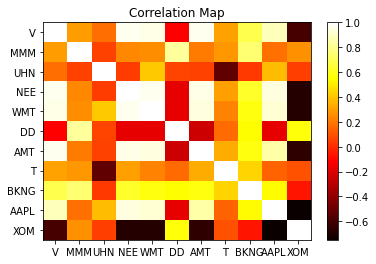

In [12]:
# Graphing the correlations 
plt.imshow(sectorcorr, cmap='hot', interpolation='none',aspect='auto')
plt.colorbar()
plt.xticks(range(len(sectorcorr)), sectorcorr.columns)
plt.yticks(range(len(sectorcorr)), sectorcorr.columns)
plt.title('Correlation Map');

Out of curiosity, our investor plots a correlation heatmap to see how all these industries are related. For instance, a lighter colour means higher correlation in this case. We deduce that NextEraEnergy (Ticker: NEE, Industry: Utilities) and Visa (Ticker: V, Industry: Financials) has a high positive correlation while Apple (Ticker: AAPL, Industry: Financials) and ExxonMobil (Ticker: XOM, Industry: Energy are negatively correlated to each other.   However, it is important to note that the correlation heatmap only goes insofar as to tell us about the `correlation` between the two industries, it does not shed any insights on the `causation` of these relationship. 

### Our analysis of the past 5 year sector performance and analysis of the largest companies in each sector shows that the Information Technology sector offers the best returns and have a good risk-reward ratio. As our investor is looking for high growth stock and have a high risk profile, we believe our investor would be able to find the stock that matches his investor profile the best from the Information Technology Sector.

# 2. Choosing which company in the IT sector to invest in

Having decided which sector to invest in, the question that follows is what company to invest in. Our investor  believes that the top Tech companies, with their huge financial moats and relevance in the modern economy, will continue to dominate the economy in the mid-term. Therefore, he proceeds to analyse the top IT companies. He googles and collates information about the market values of the top 10 IT companies in a csv file to visualise. He then narrows down his choices to the 5 Tech companies with the largest market capitalisations. 

In [255]:
# install xlrd before doing this. Go to terminal -> cd into project directory and copy ' conda install -c anaconda xlrd'
tech_df = pd.read_csv('marketcap.csv', index_col=0)
tech_df

,Market Capitalisation (in USD billions)
Companies,
Apple,2080
Microsoft,1630
Amazon,1580
Alphabet,1200
Facebook,782
Tencent Holdings,723
Taiwan Semiconductor Manufacturing,501
Samsung Electronics,440
NVIDIA,330


Once again, a dataframe is not all that informative, so we plot a bar graph to get a better visualisation of the relative market capitalisations. 

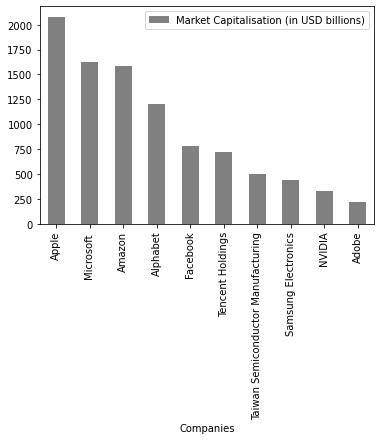

In [259]:
tech_df.plot(kind='bar', color='gray');

In [260]:
tech_df.describe()

,Market Capitalisation (in USD billions)
count,10.00000
mean,948.90000
std,637.10028
min,223.00000
25%,455.25000
50%,752.50000
75%,1485.00000
max,2080.00000


Average market capitalisation of the 10 companies is USD `948 Billion` with a standard deviation of `637 billion`. As seen in the barplot, the top 5 companies are substantially larger in market capitalisation than the others. Therefore, our investor narrows his choices down to `Apple`, `Microsoft`, `Amazon`, `Alphabet`, `Facebook`

In [13]:
# Import and view competitors' stock prices 
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2021,3,26)
dfcomp = web.DataReader(['AAPL','FB','GOOG','AMZN', 'MSFT'],'yahoo', start = start, end=end)['Adj Close']

In [14]:
# Finding out if there is a correlation between prices of different stocks 
retscomp = dfcomp.pct_change()
corr = retscomp.corr()

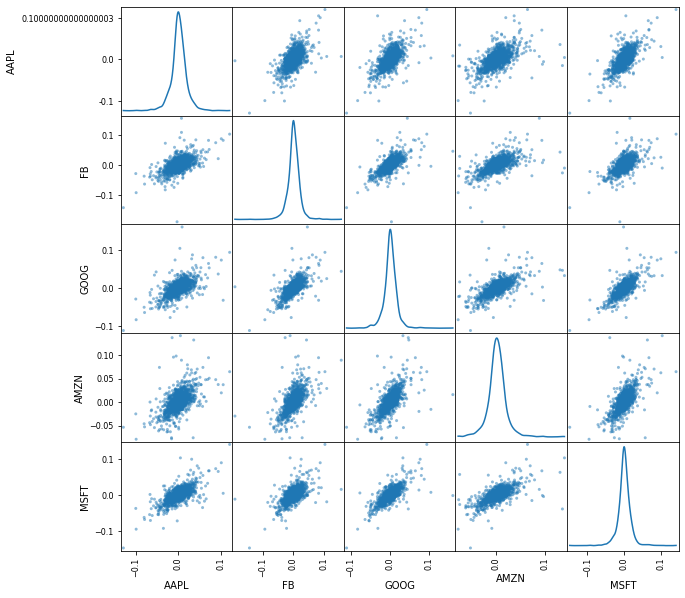

In [15]:
# Run kernal density estimation 
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10,10));

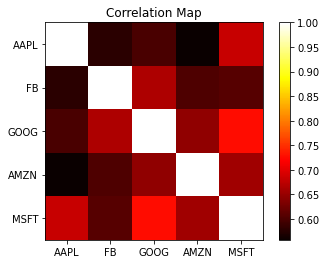

In [16]:
# Graphing the correlations 
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Map');

Out of curiosity, our investor plots a correlation heatmap to see how all these companies within the IT sector are related. For instance, a lighter colour means higher correlation in this case. We deduce that Google (Ticker: GOOG) and Microsoft (Ticker: MSFT) has a high positive correlation while Apple (Ticker: AAPL) and Amazon (Ticker: AMZN) are negatively correlated to each other.   However, it is important to note that the correlation heatmap only goes insofar as to tell us about the `correlation` between the two industries, it does not shed any insights on the `causation` of these relationship. 

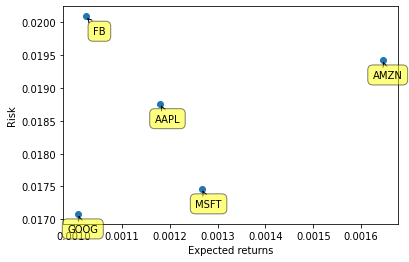

In [17]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

### Based on the visualisation of the Risk vs Expected return graph, we can see that Amazon (Ticker: AMZN) and Microsoft (Ticker: MSFT) offers the highest expected return as well as decent risk-reward ratio as it falls right below the diagonal straight line that cuts through the graph. This suits our investor portfolio of high growth stock with huge appetite for risks. Thus we can narrow down our choice of companies to `Amazon` and `Microsoft`.

### To decide whether to invest in Microsoft or Amazon, we perform further quantitative and qualitative analysis on both the companies.

# 3. Rolling Mean Average Analysis
The rolling mean moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It helps in smoothing out short-term fluctuations and highlight longer-term trends or cycles. This allows us to analyse the trajectory of the stocks more effectively 

In [16]:
amzndf = web.DataReader('AMZN', 'yahoo', start, end)

In [19]:
# Rolling mean analysis 
amzn_close_px = amzndf['Adj Close']
amzn_mavg = amzn_close_px.rolling(window=100).mean()

In [20]:
msft_df = web.DataReader('MSFT', 'yahoo', start, end)

In [21]:
# Rolling mean analysis 
msft_close_px = msft_df['Adj Close']
msft_mavg = msft_close_px.rolling(window=100).mean()

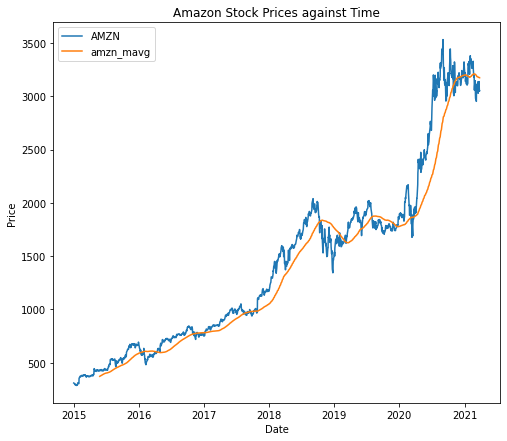

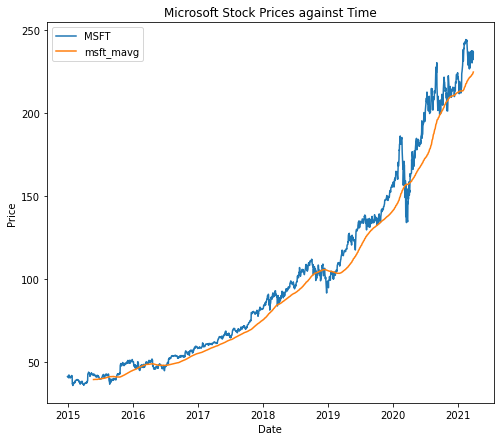

In [22]:
# Overlaying and plotting Amazon's moving average against stock price chart 
%matplotlib inline 

# Plotting the graphs
fig, ax = plt.subplots(figsize=(8,7))
ax.plot(amzn_close_px, label='AMZN')
ax.plot(amzn_mavg, label='amzn_mavg')
plt.legend()

# Setting axis labels
plt.title('Amazon Stock Prices against Time')
plt.xlabel('Date')
plt.ylabel('Price');

# Plotting the graphs
fig, ax = plt.subplots(figsize=(8,7))
ax.plot(msft_close_px, label='MSFT')
ax.plot(msft_mavg, label='msft_mavg')
plt.legend()

# Setting axis labels
plt.title('Microsoft Stock Prices against Time')
plt.xlabel('Date')
plt.ylabel('Price');

### The rolling mean average analysis shows us that both `Amazon` and `Microsoft` have been increasing. However, `Amazon` has increased faster than `Microsoft` as seen from the increase in price from USD 450 to about USD 3000+ (around a 700% increase), whereas `Microsoft` only increased from USD 50 to USD 250 (a 500% increase)

# 4. Comparison of volatility
We analyse the volatility of these 2 stocks

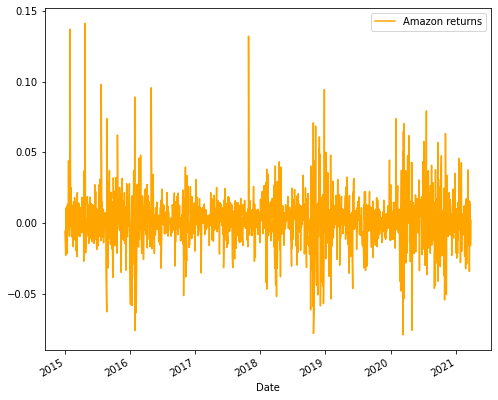

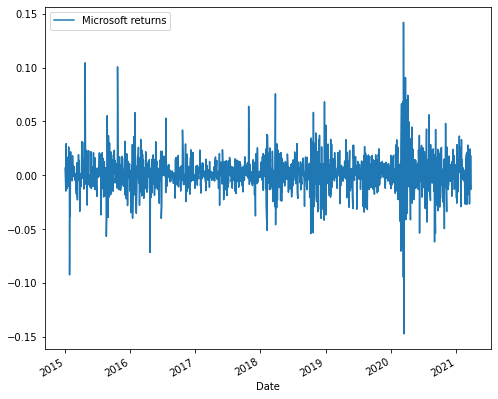

In [23]:
# Plotting rate of returns for Amazon
amzn_rets = amzn_close_px / amzn_close_px.shift(1) - 1

fig, ax = plt.subplots(figsize=(8,7))
amzn_rets.plot(label='Amazon returns', color='orange')
plt.legend();

# Plotting rate of returns for Amazon
msft_rets = msft_close_px / msft_close_px.shift(1) - 1
fig, ax = plt.subplots(figsize=(8,7))
msft_rets.plot(label='Microsoft returns')
plt.legend();

It is difficult for us to compare the votality of the 2 companies in 2 seperate plots, so let us overlay them to get a better picture.

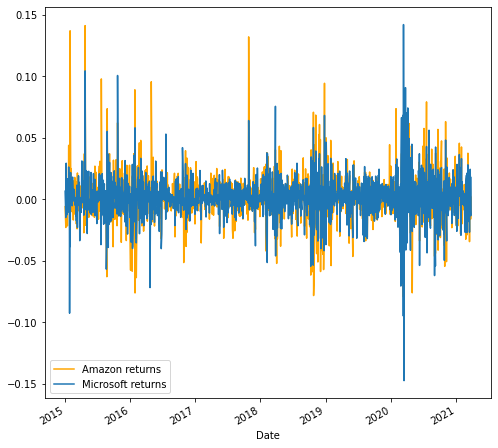

In [24]:
# Plotting rate of returns for Amazon
amzn_rets = amzn_close_px / amzn_close_px.shift(1) - 1
fig, ax = plt.subplots(figsize=(8,8))
amzn_rets.plot(label='Amazon returns', color='orange')
plt.legend();

# Plotting rate of returns for Amazon
msft_rets = msft_close_px / msft_close_px.shift(1) - 1
msft_rets.plot(label='Microsoft returns')
plt.legend();

We can see that Amazon's returns fluctuate more aggressively as compared to Microsoft. Thus, we can 

We can reaffirm this observation by calculating and comparing the volatility of the two companies, based on the formula below.

## Formula for volatility:

Volatility over a time period = Standard deviation of returns x sqrt(no. of periods in time period)

In [25]:
amzn_vol = amzn_rets.std()*np.sqrt(len(amzn_rets))
msft_vol = msft_rets.std()*np.sqrt(len(msft_rets))
print("AMZN Volatility =", amzn_vol)
print("MSFT Volatility =", msft_vol)

AMZN Volatility = 0.7698216603955648
MSFT Volatility = 0.691968086571288


As we can see, AMZN is clearly more volatile than MSFT.


### However, it is important to note that a higher volatility in and of itself does not automatically make Amazon a better stock. Nevertheless, is indicative of the possible fluctuations in price in the short to mid term that the enterprising investor may be able to capitalise on should he wish to. 

# Comparison of EPS
Earnings per Share (EPS) is the ratio of a company’s net profit to the number of its outstanding shares. When comparing one company to others, a higher EPS is considered the mark of a stronger business. When contrasting current company performance to its earlier performance, increasing EPS values indicate growing profitability.

In [26]:
#alpha_vantage wrapper does not include fundamentals
import requests
import json

##Extract MSFT EPS
symbol="MSFT"

#request.get helps retrieve information from the api (Note using the f string format). text converts teh info to string.
#.json.loads converts the string to a dictionary type
call=requests.get(f'https://www.alphavantage.co/query?function=EARNINGS&symbol={symbol}&apikey={key}').text
call=json.loads(call)
annualEPS_df = pd.DataFrame([['1999-01-01',0,0]],columns = ['Fiscal_Date_Ending','MSFT_Annual_EPS', 'AMZN_Annual_EPS'])
annualEPS_df.drop([0], inplace=True)

#Loop to extract the Annual EPS for the past 20 years
for i in range(6):
    x=call['annualEarnings'][i]['fiscalDateEnding']
    y=float(call['annualEarnings'][i]['reportedEPS'])                           
    annualEPS_df.loc[i,'Fiscal_Date_Ending']=x
    annualEPS_df.loc[i,'MSFT_Annual_EPS']=y

#Clean the data and reset ind
annualEPS_df=annualEPS_df.drop([0]) 
annualEPS_df=annualEPS_df.reset_index()
annualEPS_df=annualEPS_df.drop('index',axis=1)


##Extract AMZN EPS
symbol="AMZN"

#request.get helps retrieve information from the api (Note using the f string format). text converts teh info to string.
#.json.loads converts the string to a dictionary type
call=requests.get(f'https://www.alphavantage.co/query?function=EARNINGS&symbol={symbol}&apikey={key}').text
call=json.loads(call)

#Loop to extract the Annual EPS for the past 20 years
for i in range(5):
    y=float(call['annualEarnings'][i]['reportedEPS'])                            
    annualEPS_df.loc[i,'AMZN_Annual_EPS']=y
    
print(annualEPS_df)

  Fiscal_Date_Ending  MSFT_Annual_EPS  AMZN_Annual_EPS
0         2020-06-30             5.75           0.0000
1         2019-06-30             4.75          41.7700
2         2018-06-30             3.88          23.0100
3         2017-06-30             3.31          20.1300
4         2016-06-30             2.76           4.5512


In [27]:
#Convert columns to float type
annualEPS_df["MSFT_Annual_EPS"]=annualEPS_df.MSFT_Annual_EPS.astype(float)
annualEPS_df["AMZN_Annual_EPS"]=annualEPS_df.AMZN_Annual_EPS.astype(float)


##Calculate Percentage change of EPS
MSFT_hold= annualEPS_df["MSFT_Annual_EPS"]
AMZN_hold= annualEPS_df["AMZN_Annual_EPS"]
#extract percentage change of EPS to a new variable
MSFT_pc=MSFT_hold.pct_change()
AMZN_pc=AMZN_hold.pct_change()

#Add EPS back to the main dataframe
annualEPS_df["MSFT Percentage change"] = MSFT_pc*100
annualEPS_df["AMZN Percentage change"] = AMZN_pc*100

In [28]:
annualEPS_df.sort_values(by = "Fiscal_Date_Ending",inplace=True,ascending=True)
annualEPS_df

,Fiscal_Date_Ending,MSFT_Annual_EPS,AMZN_Annual_EPS,MSFT Percentage change,AMZN Percentage change
4,2016-06-30,2.76,4.5512,-16.616314,-77.390959
3,2017-06-30,3.31,20.1300,-14.690722,-12.516297
2,2018-06-30,3.88,23.0100,-18.315789,-44.912617
1,2019-06-30,4.75,41.7700,-17.391304,inf
0,2020-06-30,5.75,0.0000,NaN,NaN


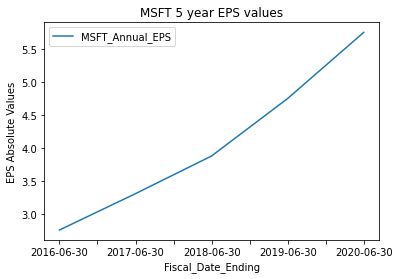

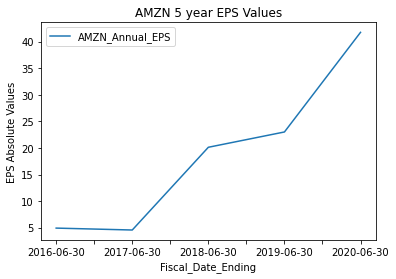

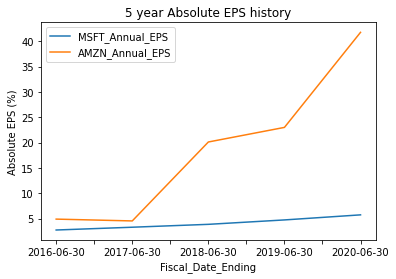

In [299]:
annualEPS_df.plot(y = "MSFT_Annual_EPS", x = "Fiscal_Date_Ending")
plt.title("MSFT 5 year EPS values")
plt.ylabel("EPS Absolute Values")
annualEPS_df.plot(y = "AMZN_Annual_EPS", x = "Fiscal_Date_Ending")
plt.title("AMZN 5 year EPS Values")
plt.ylabel("EPS Absolute Values");
ax=annualEPS_df.plot(y = "MSFT_Annual_EPS", x = "Fiscal_Date_Ending")
annualEPS_df.plot(y = "AMZN_Annual_EPS", x = "Fiscal_Date_Ending", ax=ax)
plt.title("5 year Absolute EPS history")
plt.ylabel("Absolute EPS (%)");

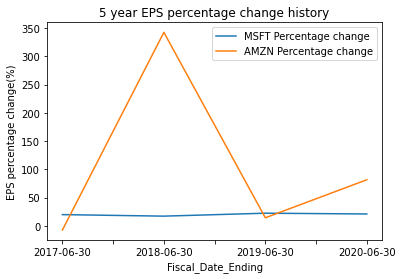

In [295]:
ax=annualEPS_df.plot(y = "MSFT Percentage change", x = "Fiscal_Date_Ending")
annualEPS_df.plot(y = "AMZN Percentage change", x = "Fiscal_Date_Ending", ax=ax)
plt.title("5 year EPS percentage change history")
plt.ylabel("EPS percentage change(%)");

### As seen from the 5 year absolute graphs above, both AMZN and MSFT absolute EPS were increasing across the 5 years, which is a good sign as it shows both companies are consistently generating value for their shareholders.
### However if we were to compare the 5 year EPS percentage change history graph, it can be seen that AMZN have a significantly larger percentage increase in EPS as compared to MSFT, this could be due to .

## Comparison of Profit Margin
Profit margin is one of the commonly used profitability ratios to gauge the degree to which a company or a business activity makes money. It represents what percentage of sales has turned into profits. A higher profit margin means that the company makes more profits per dollar of sales and this is usually indicative of the operational proweress of the business.

In [285]:
import requests
import json
def get_profitmargin(symbol):
    call=requests.get(f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={key}').text
    call=json.loads(call)
    df = pd.DataFrame([['1999-01-01',0]],columns = ["date","profit margin"])
    reports = call["quarterlyReports"]
    for rep in reports:
        rev = int(rep["totalRevenue"])
        cost = int(rep["costOfRevenue"])
        profmarg = (rev-cost)/rev
        temp = pd.DataFrame([[rep["fiscalDateEnding"], profmarg]], columns = ["date","profit margin"])
        df = pd.concat([df,temp], ignore_index = True)
        pd.to_datetime(df["date"])
        df.sort_values(by = "date",ascending = True, inplace= True)
    df.drop([0], inplace=True)
    return df

def get_cashflow(symbol):
    call=requests.get(f'https://www.alphavantage.co/query?function=CASH_FLOW&symbol={symbol}&apikey={key}').text
    call=json.loads(call)
    df = pd.DataFrame([['1999-01-01',0]],columns = ["date","cash flow"])
    reports = call["quarterlyReports"]
    for rep in reports:
        temp = pd.DataFrame([[rep["fiscalDateEnding"], int(rep["changeInCashAndCashEquivalents"])]], columns = ["date","cash flow"])
        df = pd.concat([df,temp], ignore_index = True)
        pd.to_datetime(df["date"])
        df.sort_values(by = "date",ascending = True, inplace= True)
    df.drop([0], inplace=True)
    return df

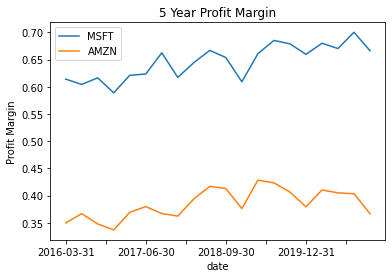

In [286]:
msft = get_profitmargin("MSFT")
amzn = get_profitmargin("AMZN")
ax = msft.plot(y = "profit margin", x = "date")
amzn.plot(ax = ax, y = "profit margin", x = "date")
plt.ylabel("Profit Margin")
plt.title("5 Year Profit Margin")
ax.legend(["MSFT","AMZN"]);

We can observe that MSFT has had better profit margins in the past 5 years compared to AMZN. It is not unexpected, as AMZN focuses more on future growth compared to MSFT, thus it should not expect to see as much profits now. However, Amazon's profit margin is still much higher than the sector average of around 20%.

## Comparison of Cash Flow
The cash flow report is important because it informs the reader of the business cash position. For a business to be successful, it must have sufficient cash at all times. It needs cash to pay its expenses, to pay bank loans, to pay taxes and to purchase new assets. Therefore, a higher cash flow is usuallly indicative of a better business.

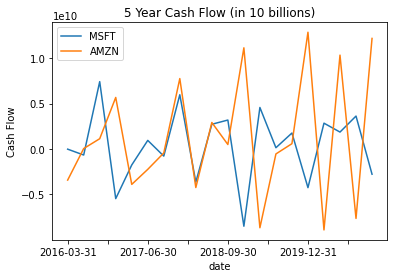

In [287]:
msftcf = get_cashflow("MSFT")
ax = msftcf.plot(y = "cash flow", x = "date")
amzncf = get_cashflow("AMZN")
amzncf.plot(y = "cash flow", x = "date", ax = ax)
plt.ylabel("Cash Flow")
plt.title("5 Year Cash Flow (in 10 billions)")
ax.legend(["MSFT","AMZN"]);

Both companies' cash flow seems to fluctuate wildly. However we can observe that Amazon's drops are much more drastic. Further research tells us that this is because Amazon aggressively invests their spare cash into R&D. This means that they are more likely to innovate and maintain their market share than Microsoft

# Explain why we chose Amazon

# Machine Learning Models

## Data Preparation

In [17]:
amzndf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,312.980011,310.010010,311.549988,310.350006,2048000,310.350006
2015-01-02,314.750000,306.959991,312.579987,308.519989,2783200,308.519989
2015-01-05,308.380005,300.850006,307.010010,302.190002,2774200,302.190002
2015-01-06,303.000000,292.380005,302.239990,295.290009,3519000,295.290009
2015-01-07,301.279999,295.329987,297.500000,298.420013,2640300,298.420013
...,...,...,...,...,...,...
2021-03-22,3126.580078,3060.050049,3067.850098,3110.870117,2902200,3110.870117
2021-03-23,3182.000000,3120.850098,3127.000000,3137.500000,3817300,3137.500000
2021-03-24,3160.310059,3085.149902,3151.040039,3087.070068,2959000,3087.070068


In [41]:
dfreg = amzndf.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (amzndf['High'] - amzndf['Low']) / amzndf['Close'] * 100.0
dfreg['PCT_change'] = (amzndf['Close'] - amzndf['Open']) / amzndf['Open'] * 100.0

In [42]:
import math 
from sklearn import preprocessing
# Drop missing value 
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separate the label (AdjClose)
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)


In [43]:
X = np.array(dfreg.drop(['label'],axis=1))

# Scale the X so that everyone can have the same distribution for linear regression 
X = preprocessing.scale(X)

# We want to find Data Series for model generation and evaluation 
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y 
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [44]:
pd.DataFrame(X).tail()

,0,1,2,3
1549,1.945118,-0.007249,0.491230,-0.044089
1550,2.007847,-0.711212,-0.361148,0.394490
1551,1.947004,-0.774616,0.263077,-1.034721
1552,1.841459,-0.146866,1.229234,-1.646080
1553,1.809122,0.532984,1.253222,-0.758416


In [65]:
#setting default figsize
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#standardise train size for all models
trainsize = round(0.7*len(X))

## Quadratic Regression Model

In [86]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Explained Variance for Quadratic Regression:		 0.812928749272229
Root Mean Squared Error for Quadratic Regression:	 270.7121253968871


<ipython-input-90-2c2535abc3f1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regtrain["pred"] = reg_y_train_pred
<ipython-input-90-2c2535abc3f1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regtest["pred"] = reg_y_test_pred


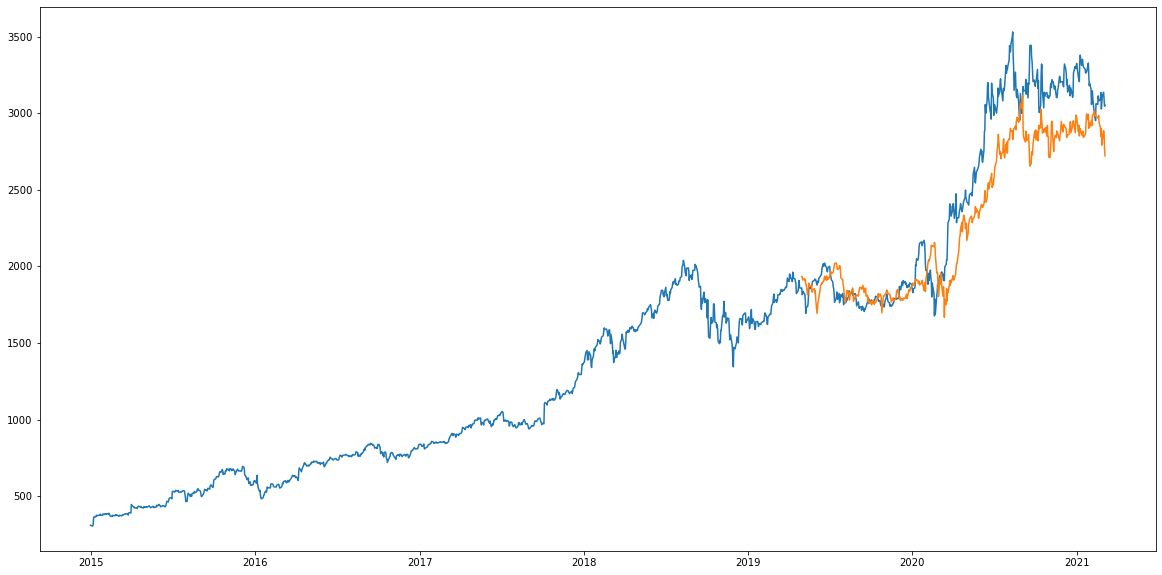

In [90]:
# Making training and test set
X_train = X[0:trainsize]
y_train = y[0:trainsize]
X_test = X[trainsize:]
y_test = y[trainsize:]

# Fit the model to the data 
quadreg = make_pipeline(PolynomialFeatures(2),Ridge())
quadreg.fit(X_train, y_train)

reg_y_train_pred = quadreg.predict(X_train)
reg_y_test_pred = quadreg.predict(X_test)
regtrain = dfreg[0:trainsize]
regtest = dfreg[trainsize : trainsize + len(y_test_pred)]
regtrain["pred"] = reg_y_train_pred
regtest["pred"] = reg_y_test_pred

score_quadreg = quadreg.score(X_test,y_test)
rmse_quadreg = mean_squared_error(y_test,regtest["pred"], squared=False)
print("Explained Variance for Quadratic Regression:\t\t", score_quadreg)
print("Root Mean Squared Error for Quadratic Regression:\t", rmse_quadreg)
plt.plot(dfreg["label"])
plt.plot(regtest["pred"])
plt.show()

As we can see, the quadratic regression model is able to recognise patterns in the data, such as the jump in stock prices after a small dip every year. Thus, it's accuracy is rather commendable, with an explained variance of 0.81, and is a possible model that our investor can use to predict Amazon's stock prices. 

# ARIMA & Auto ARIMA

ARIMA stands for Auto-Regressive Integrated Moving Average, and it is a very popular method for time series forecasting. The model takes into account the past values to predict the future values. There are three important parameters in ARIMA:

-p (past values used for forecasting the next value)

-q (past forecast errors used to predict the future values)

-d (number of lagged forecast errors)

However, tuning these paramters consumes a lot of time. To tackle this, we decided to use auto ARIMA, which automatically selects the combination of (p,q,d) that yields the least error.

In [32]:
from pmdarima.arima import auto_arima

In [68]:
arima_train = amzndf[:trainsize]
arima_test = amzndf[trainsize:]

arima_training = arima_train['Close']

arima_model = auto_arima(arima_training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
arima_model.fit(arima_training)

arima_forecast = arima_model.predict(n_periods = amzndf.shape[0] - trainsize)
arima_forecast = pd.DataFrame(forecast,index = arima_test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.96 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=10398.181, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=10144.962, Time=0.43 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.48 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=10398.953, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=9974.479, Time=1.26 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.62 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.98 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=9973.333, Time=1.02 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=10145.225, Time=0.32 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=12.18 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.92 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=9974.397, Time=1.38 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=15.01 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=9975.

Explained Variance:		 -5.357499073210123
Root Mean Squared Error:	 1572.3912552620925


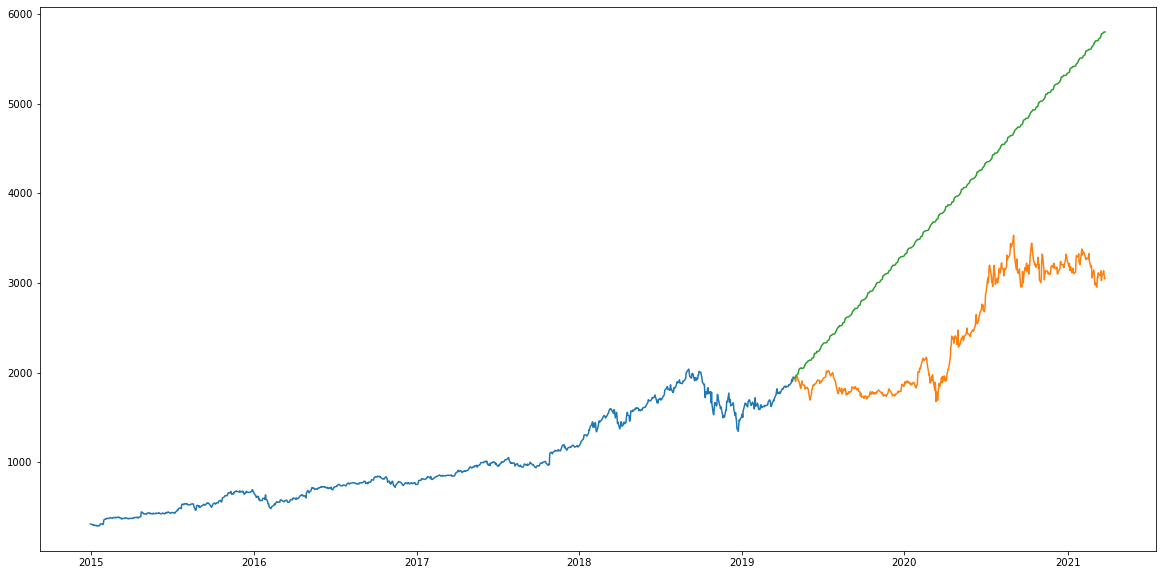

In [93]:
from sklearn.metrics import r2_score
score_ARIMA = r2_score(arima_test['Close'], forecast['Prediction'])
rmse_ARIMA = mean_squared_error(arima_test["Close"], forecast['Prediction'], squared=False)
print("Explained Variance:\t\t", score_ARIMA)
print("Root Mean Squared Error:\t", rmse_ARIMA)
plt.plot(arima_train['Close'])
plt.plot(arima_test['Close'])
plt.plot(arima_forecast['Prediction'])

As we can see, ARIMA seems to have understood the increasing trend of Amazon's stock price. However, it does not account for the seasonal trends of the stock. This leads to the model only predicting increasing stock prices, when in actual fact the stock price was dipping. This leads to a rather inaccurate model, with an explained variance of -5.36, which is worse than what a horizontal line would be able to predict.

# LSTM Machine Learning Model

Given the limitations of the regression model we used earlier, our investor could look to adopt a more accurate machine learning model to predict the stock prices of AMZN instead, such as LSTM.

Long short-term memory (LSTM) is a recurrent neural network which has long-term memory. It does not only take in the inputs given, but also past inputs from its memory.  This memory is maintained in a cell state, which can add or remove information which it thinks is useful in its predictions.

This feature is extremely important in predicting stock prices, as past prices often heavily influence future prices. Thus a model which is able to remember and make use of past stock prices in its predictions will greatly improve its accuracy.

In [47]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2021,3,26)
df = web.DataReader('AMZN', 'yahoo', start, end)

#read the file
#df = pd.read_csv('NSE-TATAGLOBAL11.csv')

#df["Date"]=df.index
df.reset_index(inplace=True)
df["Date"].astype(str)
#print the head
df.head()
df
type(df["Date"].loc[1])

pandas._libs.tslibs.timestamps.Timestamp

In [74]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,312.980011,310.010010,311.549988,310.350006,2048000,310.350006
2015-01-02,314.750000,306.959991,312.579987,308.519989,2783200,308.519989
2015-01-05,308.380005,300.850006,307.010010,302.190002,2774200,302.190002
2015-01-06,303.000000,292.380005,302.239990,295.290009,3519000,295.290009
2015-01-07,301.279999,295.329987,297.500000,298.420013,2640300,298.420013
...,...,...,...,...,...,...
2021-03-22,3126.580078,3060.050049,3067.850098,3110.870117,2902200,3110.870117
2021-03-23,3182.000000,3120.850098,3127.000000,3137.500000,3817300,3137.500000
2021-03-24,3160.310059,3085.149902,3151.040039,3087.070068,2959000,3087.070068


In [106]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler

#creating dataframe
amzndf.reset_index(inplace=True)
data = amzndf.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(amzndf)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
#new_data=new_data.iloc[::-1]

#creating train and test sets
dataset = new_data.values

train = dataset[0:trainsize,:]
valid = dataset[trainsize:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

1028/1028 - 18s - loss: 6.3549e-04


Explained Variance:		 0.9596179688794443
Root Mean Squared Error:	 125.31744928590831


<ipython-input-107-a1721e130433>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


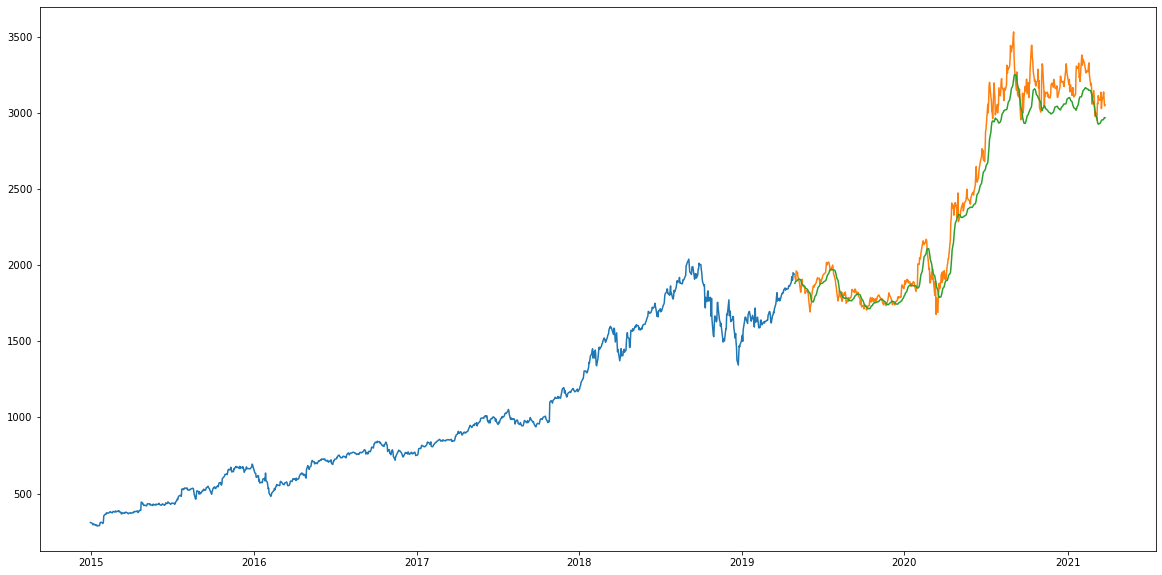

In [107]:
train = new_data[:trainsize]
valid = new_data[trainsize:]
valid['Predictions'] = closing_price
score_LSTM=r2_score(valid['Close'],valid['Predictions'])
rmse_LSTM = mean_squared_error(valid['Close'],valid['Predictions'], squared=False)
print("Explained Variance:\t\t", score_LSTM)
print("Root Mean Squared Error:\t", rmse_LSTM)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

As we can see, the prices predicted by the LSTM model follow the actual prices very closely, especially when compared to the previous models. Thus, it is safe to say that the LSTM model is the best model that our investor can use to predict stock prices for AMZN.

In [108]:
print("Model\t\t\t\tExplained Variance\t\t\t\tRoot Mean Squared Error")
print("Quadratic Regression\t\t{}\t\t\t\t{}".format(score_quadreg, rmse_quadreg))
print("ARIMA\t\t\t\t{}\t\t\t\t{}".format(score_ARIMA, rmse_ARIMA))
print("LSTM\t\t\t\t{}\t\t\t\t{}".format(score_LSTM, rmse_LSTM))

Model				Explained Variance				Root Mean Squared Error
Quadratic Regression		0.812928749272229				270.7121253968871
ARIMA				-5.357499073210123				1572.3912552620925
LSTM				0.9596179688794443				125.31744928590831


### Comparing LSTM and Quadratic Regression model

The explained variance of LSTM model is higher than that of Quadratic Regression, thus this shows that the predicted graph using LSTM model fits the graph better.
Also the Root Mean Squared error of LSTM model is lower than that of Quadratic Regresion, showing that the LSTM model prediction for the y_test score is closer to the actual y_test score.
Thus LSTM would be a better model to predict share prices

Furthermore, as past stock prices are important in predicting future stock prices, we need to perform a time series analysis. Given that LSTM models are able to store information over a period of time while quadradic regression model assumes that all of the observations are independant of each other, LSTM model would therefore be a better model to predict future stock prices.

### Comparing LSTM and ARIMA

As for comparing between LSTM and ARIMA, LSTM works better if we are dealing with huge amount of data, and enough training data is available, while ARIMA is better for smaller datasets.

Furthermore, ARIMA requires a series of parameters (p,q,d) which must be calculated based on data, while LSTM does not require setting such parameters. 

# Conclusion

In conclusion, our young investor should utilise LSTM to help him predict the future stock prices of Amazon, especially given the fact that he has plenty of training data available to him.